In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from plot import plot_training_vs_validation
from sklearn.metrics import confusion_matrix, classification_report

## Binary Class | CNN-LSTM

In [3]:
bin_data = pd.read_csv("bin_data.csv")
multi_data = pd.read_csv("multi_data.csv")

In [ ]:
bin_data.head()

In [4]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [11]:
hybrid_model_bin = Sequential()
hybrid_model_bin.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
hybrid_model_bin.add(MaxPooling1D(pool_size=2))
hybrid_model_bin.add(LSTM(units=100, activation='relu', return_sequences=True))
hybrid_model_bin.add(Dropout(0.35))
hybrid_model_bin.add(LSTM(units=60, activation='relu'))
hybrid_model_bin.add(Dropout(0.15))
hybrid_model_bin.add(Dense(units=10, activation='softmax'))

In [12]:
adam_optimizer = Adam(learning_rate=1e-4)
hybrid_model_bin.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

In [13]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

In [59]:
hybrid_model_bin_history = hybrid_model_bin.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_reshaped, y_test),
    callbacks=callbacks
)

Epoch 1/50


364/364 [==============================] - 53s 134ms/step - loss: 0.8958 - accuracy: 0.7642 - val_loss: 0.2388 - val_accuracy: 0.9248


C:\Users\Abinash\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
364/364 [==============================] - 51s 139ms/step - loss: 0.1421 - accuracy: 0.9555 - val_loss: 0.1221 - val_accuracy: 0.9593
Epoch 3/50
364/364 [==============================] - 45s 124ms/step - loss: 0.1256 - accuracy: 0.9591 - val_loss: 0.1208 - val_accuracy: 0.9593
Epoch 4/50
364/364 [==============================] - 47s 130ms/step - loss: 0.1230 - accuracy: 0.9594 - val_loss: 0.1192 - val_accuracy: 0.9591
Epoch 5/50
364/364 [==============================] - 46s 125ms/step - loss: 0.1210 - accuracy: 0.9595 - val_loss: 0.1207 - val_accuracy: 0.9594
Epoch 6/50
364/364 [==============================] - 43s 118ms/step - loss: 0.1185 - accuracy: 0.9596 - val_loss: 0.1163 - val_accuracy: 0.9593
Epoch 7/50
364/364 [==============================] - 49s 135ms/step - loss: 0.1145 - accuracy: 0.9598 - val_loss: 0.1137 - val_accuracy: 0.9593
Epoch 8/50
364/364 [==============================] - 44s 120ms/step - loss: 0.1105 - accuracy: 0.9600 - val_loss: 0.1051 - val_ac

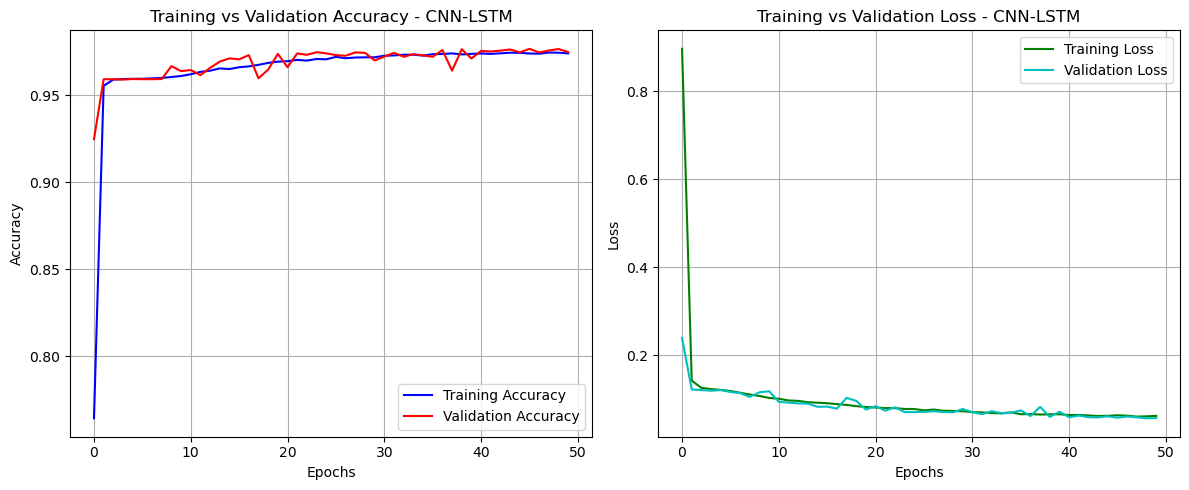

In [61]:

plot_training_vs_validation(hybrid_model_bin_history, "CNN-LSTM | Binary")

In [62]:
y_test_probabilities = hybrid_model_bin_history.predict(X_test_reshaped)
y_test_pred = np.argmax(y_test_probabilities, axis=1)

conf_matrix = confusion_matrix(y_test, y_test_pred)

728/728 [==============================] - 9s 10ms/step


In [63]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17284   111]
 [  472  5404]]


In [64]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17395
           1       0.98      0.92      0.95      5876

    accuracy                           0.97     23271
   macro avg       0.98      0.96      0.97     23271
weighted avg       0.98      0.97      0.97     23271



## Multi Class | CNN-LSTM

In [150]:
X = multi_data.drop(columns=['label'],axis=1)
Y = multi_data['label']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [155]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

X_train_padded = np.pad(X_train_reshaped, ((0, 0), (0, 1), (0, 0)), mode='constant')
X_test_padded = np.pad(X_test_reshaped, ((0, 0), (0, 1), (0, 0)), mode='constant')

print(X_train_padded.shape)
print(X_test_padded.shape)

(93081, 13, 1)
(23271, 13, 1)
(93081, 14, 1)
(23271, 14, 1)


In [157]:
# Compile the model
adam_optimizer = Adam(learning_rate=1e-4)
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_cnn.h5', monitor='val_loss', save_best_only=True)
]

hybrid_multi_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_padded, y_test),
    callbacks=callbacks
)

Epoch 1/50
364/364 [==============================] - ETA: 0s - loss: 13.3931 - accuracy: 0.0093

C:\Users\Abinash\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


364/364 [==============================] - 36s 72ms/step - loss: 13.3931 - accuracy: 0.0093 - val_loss: 2.3979 - val_accuracy: 0.1778
Epoch 2/50
364/364 [==============================] - 22s 61ms/step - loss: 1.8208 - accuracy: 0.2684 - val_loss: 1.2469 - val_accuracy: 0.6593
Epoch 3/50
364/364 [==============================] - 22s 60ms/step - loss: 1.0784 - accuracy: 0.6331 - val_loss: 0.7778 - val_accuracy: 0.7921
Epoch 4/50
364/364 [==============================] - 24s 65ms/step - loss: 0.7957 - accuracy: 0.7178 - val_loss: 0.5929 - val_accuracy: 0.8829
Epoch 5/50
364/364 [==============================] - 23s 62ms/step - loss: 0.6356 - accuracy: 0.7863 - val_loss: 0.4417 - val_accuracy: 0.8835
Epoch 6/50
364/364 [==============================] - 21s 57ms/step - loss: 0.4923 - accuracy: 0.8451 - val_loss: 0.3171 - val_accuracy: 0.8888
Epoch 7/50
364/364 [==============================] - 28s 77ms/step - loss: 0.3756 - accuracy: 0.8817 - val_loss: 0.2353 - val_accuracy: 0.9128
Ep

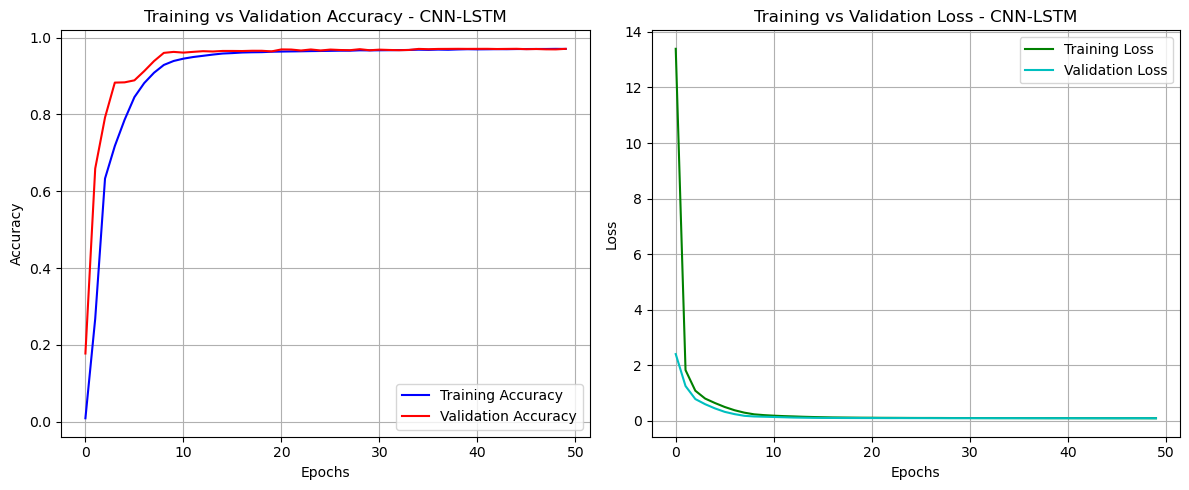

In [158]:
plot_training_vs_validation(cnn_history, "CNN-LSTM")

In [160]:
y_test_probabilities = cnn_model.predict(X_test_padded)
y_test_pred = np.argmax(y_test_probabilities, axis=1)

conf_matrix = confusion_matrix(y_test, y_test_pred)

728/728 [==============================] - 7s 8ms/step


In [161]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[    0     0     0     0    77     0     0    27     0]
 [    0     0     0     0     9     0     0    16     0]
 [    0     0   504     0     0     0     0     0     0]
 [    0     0     0  4211     0     0     0     0     0]
 [    0     0     0     0   274    77     0   118     0]
 [    0     0     0     0    52 11458     0    90     0]
 [    0     0     0     0     0     0  5876     0     0]
 [    0     0     0     0   180     6     0   267     0]
 [    0     0     0     0    13     0     0    16     0]]


In [162]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00        25
           2       1.00      1.00      1.00       504
           3       1.00      1.00      1.00      4211
           4       0.45      0.58      0.51       469
           5       0.99      0.99      0.99     11600
           6       1.00      1.00      1.00      5876
           7       0.50      0.59      0.54       453
           8       0.00      0.00      0.00        29

    accuracy                           0.97     23271
   macro avg       0.55      0.57      0.56     23271
weighted avg       0.97      0.97      0.97     23271



C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abinash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
